# Recorte 2014 - 2016 -> Estrategia

In [1]:
# Importando bibliotecas necessárias para a construção de grafos
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
import pandas as pd
import numpy as np
import csv
import ast
import cpnet
from graph_tool import spectral
import seaborn as sns
import regression as reg
import cpnet

from scipy import stats
from matplotlib import pyplot as plt
from graph_tool import centrality
from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1582: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1583: PendingDeprecationWarning: The register_cmap function will b

In [2]:
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
df.dropna(subset=['Publisher'], inplace=True)
df_critic = df.loc[~df['Critic_Score'].isna()]

#df = df.loc[~df['Critic_Score'].isna() & ~df['User_Score'].isna() & ~df['Rating'].isna()]

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_recortado = df.loc[(df['Year_of_Release'] >= 2014) & (df['Year_of_Release'] <= 2016) & (df['Genre'] == 'Strategy')] 
df_critic = df.loc[~df['Critic_Score'].isna()]


In [5]:
df_recortado.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
3791,StarCraft II: Legacy of the Void,PC,2015.0,Strategy,Activision,0.19,0.29,0.0,0.04,0.53,88.0,62.0,8.3,833.0,Blizzard Entertainment,T
5165,Sid Meier's Civilization: Beyond Earth,PC,2014.0,Strategy,Take-Two Interactive,0.11,0.22,0.0,0.03,0.36,81.0,78.0,5.5,1027.0,Firaxis Games,E10+
6657,Anno 2205,PC,2015.0,Strategy,Ubisoft,0.02,0.22,0.0,0.02,0.25,72.0,45.0,5.9,278.0,Blue Byte,E10+
6754,Sid Meier's Civilization VI,PC,2016.0,Strategy,Take-Two Interactive,0.09,0.13,0.0,0.02,0.25,88.0,81.0,7.3,684.0,Firaxis Games,E10+
6829,Total War: Attila,PC,2015.0,Strategy,Sega,0.09,0.13,0.0,0.02,0.24,80.0,66.0,7.3,520.0,Creative Assembly,T


In [6]:
df_recortado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 3791 to 13598
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13 non-null     object 
 1   Platform         13 non-null     object 
 2   Year_of_Release  13 non-null     float64
 3   Genre            13 non-null     object 
 4   Publisher        13 non-null     object 
 5   NA_Sales         13 non-null     float64
 6   EU_Sales         13 non-null     float64
 7   JP_Sales         13 non-null     float64
 8   Other_Sales      13 non-null     float64
 9   Global_Sales     13 non-null     float64
 10  Critic_Score     13 non-null     float64
 11  Critic_Count     13 non-null     float64
 12  User_Score       13 non-null     float64
 13  User_Count       13 non-null     float64
 14  Developer        13 non-null     object 
 15  Rating           13 non-null     object 
dtypes: float64(10), object(6)
memory usage: 1.7+ KB


In [7]:
df_recortado.Year_of_Release.value_counts()

2015.0    6
2016.0    5
2014.0    2
Name: Year_of_Release, dtype: int64

In [8]:
publishers = df_recortado["Publisher"].unique()

In [9]:
gamergate_strategy_graph = Graph(directed=False) # não-dirigido
gamergate_strategy_graph.add_vp('Publisher')
gamergate_strategy_graph.add_vp('Games_released')
gamergate_strategy_graph.add_ep('strength')

for pub in publishers:
    gamergate_strategy_graph.add_vertex(pub)
    gamergate_strategy_graph.get_vertex(pub)['Publisher'] = pub
    num_games = df_recortado['Name'].loc[df_recortado["Publisher"] == pub].nunique() 
    gamergate_strategy_graph.get_vertex(pub)['Games_released'] = num_games

In [10]:
sorted_years = list(range(2014, 2017))
print(sorted_years)

[2014, 2015, 2016]


In [11]:
df_list = []

margem = 4
for i in range(0, len(sorted_years), margem):
    df_list.append(df_recortado[df_recortado['Year_of_Release'].isin(sorted_years[i:i+margem])])

In [12]:
publisher_platforms = []
for db in df_list:
    publisher_platforms.append(db.groupby('Platform')['Publisher'].unique().to_dict())

In [13]:
for platform_dict in publisher_platforms:
    for platform, publishers in platform_dict.items():
        for i in range(len(publishers)):
            if i != len(publishers)-1:
                next_vertex = i+1
                while(next_vertex < len(publishers)):
                    if(publishers[i] != publishers[next_vertex] and not gamergate_strategy_graph.has_edge(publishers[i], publishers[next_vertex])):
                        gamergate_strategy_graph.add_edge(publishers[i], publishers[next_vertex])
                        gamergate_strategy_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] = 1
                        next_vertex += 1
                    else:
                        gamergate_strategy_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] += 1
                        next_vertex += 1

In [14]:
print('número de vértices de g:', gamergate_strategy_graph.num_vertices())

número de vértices de g: 7


In [15]:
print('número de arestaas de g:', gamergate_strategy_graph.num_edges())

número de arestaas de g: 12


In [16]:
gt_save(gamergate_strategy_graph, 'gamergate_strategy_graph.net.gz')

In [17]:
g = gt_load('gamergate_strategy_graph.net.gz')
g = gt_clean(g)
cc = centrality.closeness(g)
g.add_vp('closeness', cc)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'gamergate_strategy_sfdp.net.gz')

# Análise

<AxesSubplot: xlabel='Global_Sales', ylabel='Count'>

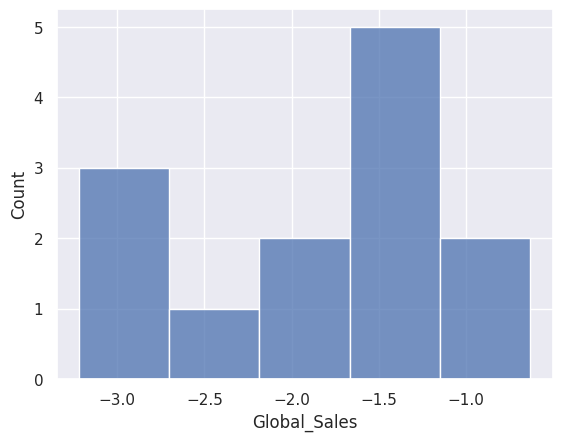

In [18]:
sns.histplot(np.log(df_recortado['Global_Sales']))

# Reconhecimento X Sucesso

In [19]:
df_rec_suc = df_recortado.copy()

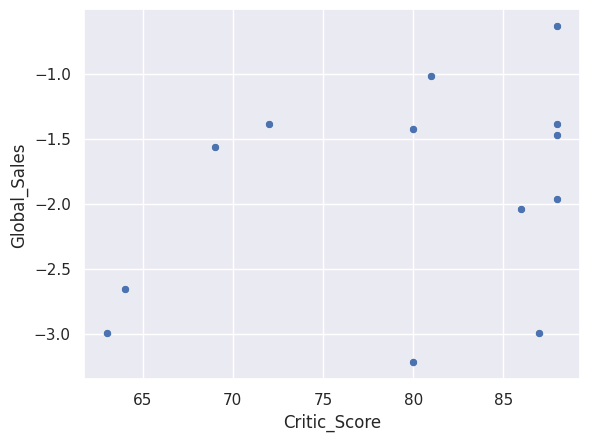

In [20]:
sns.scatterplot(x=df_rec_suc['Critic_Score'], y=np.log(df_rec_suc['Global_Sales']));

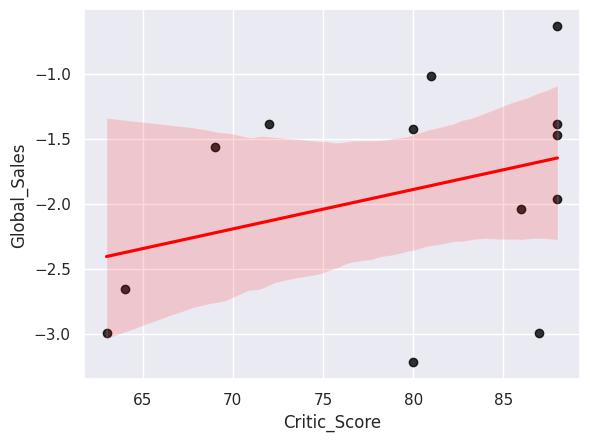

In [21]:
sns.regplot(x=df_rec_suc['Critic_Score'], y=np.log(df_rec_suc['Global_Sales']), scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [22]:
result = reg.linear(data=df_rec_suc, formula='np.log(Global_Sales) ~ Critic_Score')

In [23]:
result.summary()

/usr/local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Global_Sales)   R-squared:                       0.120
Model:                              OLS   Adj. R-squared:                  0.040
Method:                   Least Squares   F-statistic:                     1.505
Date:                  Tue, 15 Nov 2022   Prob (F-statistic):              0.245
Time:                          15:27:26   Log-Likelihood:                -14.589
No. Observations:                    13   AIC:                             33.18
Df Residuals:                        11   BIC:                             34.31
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.3161      1.978     -2.182      0.052      -8.670       0.038
Critic_Score     0.0303      0.025      1.227      0.245      -0.024       0.085
==============================================================================
Omnibus:                        1.049   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                0.888
Skew:                          -0.461   Prob(JB):                        0.642
Kurtosis:                       2.111   Cond. No.                         707.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result.micro_summary()

variable,coefficient,std error,p-value
Critic_Score,0.030317,0.024711,0.245490


In [25]:
result.nano_summary()

+0.030 (0.025)


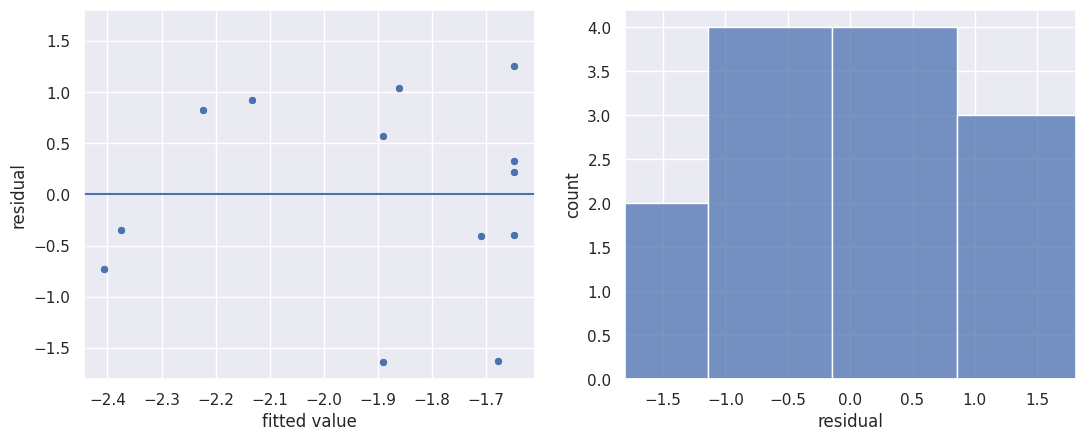

In [26]:
result.plot_residuals()

# Proximidade X Sucesso

In [27]:
df_pro_suc = df_recortado.copy()

In [28]:
g = gt_load("gamergate_strategy_sfdp.net.gz")

In [29]:
data = gt_data(g)
data.drop('Games_released', axis=1, inplace=True)
data.head()

,Publisher,closeness
id,,
Activision,Activision,0.833333
Take-Two Interactive,Take-Two Interactive,1.000000
Ubisoft,Ubisoft,0.833333
Sega,Sega,0.833333
Kalypso Media,Kalypso Media,1.000000


In [30]:
df_pro_suc = pd.merge(df_pro_suc, data, on = "Publisher", how = "inner")
df_pro_suc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             12 non-null     object 
 1   Platform         12 non-null     object 
 2   Year_of_Release  12 non-null     float64
 3   Genre            12 non-null     object 
 4   Publisher        12 non-null     object 
 5   NA_Sales         12 non-null     float64
 6   EU_Sales         12 non-null     float64
 7   JP_Sales         12 non-null     float64
 8   Other_Sales      12 non-null     float64
 9   Global_Sales     12 non-null     float64
 10  Critic_Score     12 non-null     float64
 11  Critic_Count     12 non-null     float64
 12  User_Score       12 non-null     float64
 13  User_Count       12 non-null     float64
 14  Developer        12 non-null     object 
 15  Rating           12 non-null     object 
 16  closeness        12 non-null     float64
dtypes: float64(11), ob

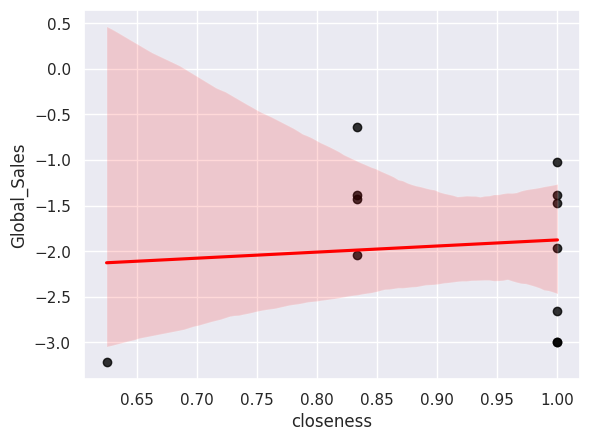

In [31]:
sns.regplot(x=df_pro_suc['closeness'], y=np.log(df_pro_suc['Global_Sales']), scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [32]:
result = reg.linear(data=df_pro_suc, formula='np.log(Global_Sales) ~ closeness')

In [33]:
result.nano_summary()

+0.668 (2.222)


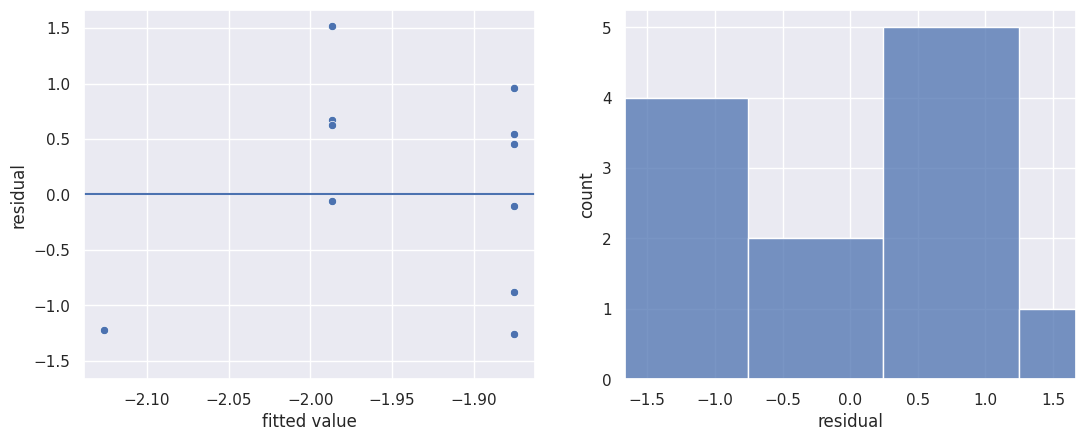

In [34]:
result.plot_residuals()